Input: adjacency matrix


In [90]:
# Obtaining the list of ingredients for each recipe. Only interested
# in the ingredients, and so I've stripped the other information such as URL
import json

with open('recipes-1.JSON') as recipes:
    data = json.load(recipes)
# print(data)

ingrs_per_recipe = []
for obj in data:
    ingrs_per_recipe.append(obj["ingredients"])
print(ingrs_per_recipe)

[['ponzu', 'shallot', 'mustard', 'olive', 'olive oil', 'wasabi', 'steak', 'tea', 'cucumber', 'salt'], ['rice', 'vinegar', 'rice vinegar', 'lemon', 'lime', 'lime juice', 'soy sauce'], ['paprika', 'sugar', 'brown sugar', 'salt', 'mustard', 'seed', 'garlic', 'garlic powder', 'onion', 'onion powder', 'oregano', 'coriander', 'cumin', 'tea', 'pepper', 'red pepper flakes', 'red pepper', 'ketchup', 'molasses', 'worcestershire sauce', 'apple', 'cider', 'vinegar', 'apple cider vinegar', 'pork'], ['flour', 'sugar', 'salt', 'tea', 'butter', 'water'], ['pepper', 'poblano', 'poblano pepper', 'potato', 'salt', 'vinegar', 'white vinegar', 'onion', 'red onion', 'tea', 'thyme', 'cilantro', 'parsley'], ['lemon', 'lemons', 'sugar', 'tea'], ['lemon', 'lemons', 'sugar', 'water'], ['water', 'tea'], ['bean', 'beans', 'pinto bean', 'pinto beans', 'salt', 'bacon', 'onion', 'chili', 'seed', 'seeds', 'clove', 'cloves', 'garlic', 'tomato', 'tomatoes', 'chicken', 'epazote', 'cilantro'], ['coffee', 'tea', 'chocolate

In [205]:
# getting the list of ingredients, lowercasing, then uniqifying
with open('foodList.txt') as f:
        ing_list = f.readlines()
ing_list = [ing[:-1].lower() for ing in ing_list]
uniq_ing_list = list(set(ing_list)) # had 3 duplicates
print('fennel seeds' in uniq_ing_list)


True


In [208]:
import pandas as pd
import itertools as iter

columns = uniq_ing_list
df = pd.DataFrame(0, index=columns, columns=columns)

for ingredient_list in ingrs_per_recipe:
    for pair in list(iter.combinations(ingredient_list,2)):
        r = pair[0]
        c = pair[1]
        curr_value = df.loc[r, c]
        new_value = curr_value + 1
        df.ix[r, c] = new_value       
        
# print(df.loc['fennel',:]) # was originally a duplicate

rookwurst               0
chicken liver           0
moambe sauce            0
bulgur                  0
passion fruit           0
hash browns             0
argan oil               0
basil                   0
bouillon                0
red cabbages            0
ketchup                 1
granola                 0
soy milk                0
meringue powder         0
wheat                   0
anise                   0
cheddar cheese          0
fennel seeds            0
madeira                 0
almond bark             0
guava                   0
liverwurst              0
aquavit                 0
baking soda             0
chipotles               0
orgeat syrup            0
sweet chili sauce       0
edamame                 0
monosodium glutamate    0
provel rope cheese      0
                       ..
capsicum                0
feta                    0
truffle                 0
ugli fruit              0
apricot                 0
cremini mushroom        0
saltines                0
aspic       

In [ ]:
# Dijkstra's algorithm
# 1. Initializations
# 2. S = [];
# 3. Q = G.vertices
# 4. while Q.length != 0
#       u = EXTRACT-MIN

def Dijkstras(G, )

<IPython.core.display.Javascript object>


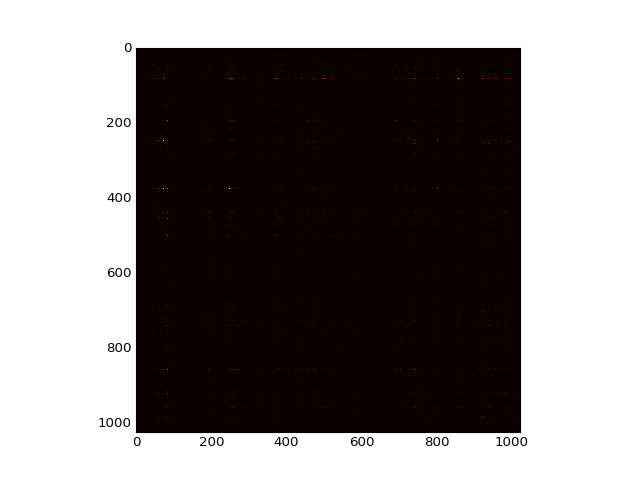

In [223]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

nparray = df.as_matrix()
plt.imshow(nparray, cmap='hot', interpolation='nearest')